# 决策树
决策树类：

```
class sklearn.tree.DecisionTreeClassifier:
                (class_weight = None,   #类别权重
                criterion = 'gini',   #选择特征的标准，默认是ghini，也可以是entropy信息增益
                max_depth = None,     #决策树的最大深度
                max_features = None,   #划分数据集时考虑的最多的特征值数量
                max_leaf_nodes = None,  #最大叶子节点数
                min_impurity_decrease = 0.0,  #节点划分最小不纯度
                min_impurity_split = None , #节点划分的最小信息增益
                min_samples_leaf = 1,     #叶子节点最小样本数
                min_samples_split = 2,    #节点划分的最小样本数
                min_weight_fraction_leaf = 0.0,
                presort = False,
                ramdom_state = None,
                splitter='best',      #选择属性特征的原则，best选所有特征中最好的，random选部分特征中最好的

```

## 参考
* https://www.bilibili.com/video/BV16e4y1U7t6
* 树的可视化 https://blog.csdn.net/wzk4869/article/details/126248859

## 数据预处理

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('/data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']

In [3]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state = 0)

## 分类决策树 训练验证可视化

In [4]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(train_X, train_y)

DecisionTreeClassifier()

In [5]:
DTC.feature_importances_ 
# 特征重要性

array([0.        , 0.02150464, 0.39766951, 0.58082584])

In [6]:
DTC.score(test_X, test_y)

0.9777777777777777

In [7]:
from sklearn.metrics import classification_report
print(classification_report(test_y,DTC.predict(test_X)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## 看看树是怎么分类的

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['font.family'] = 'SimHei'
#mpl.rcParams['axes.unicode_minus'] = False 
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#太卡了所以没用

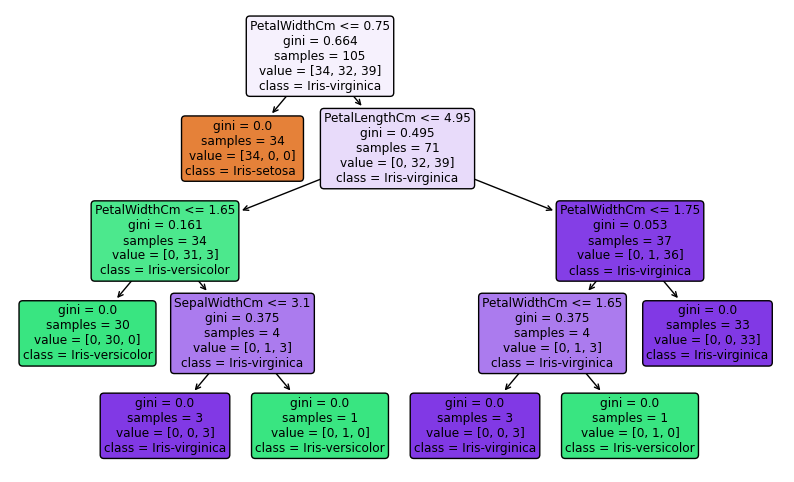

In [9]:
from sklearn import tree
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa ','Iris-versicolor','Iris-virginica']

plt.figure(figsize=(10,6))
tree.plot_tree(DTC,max_depth=5,
               feature_names=feature_names,
               class_names=class_names,
               filled=True, rounded=True)
plt.show()

## 回归决策树 训练验证可视化
* 分类决策树中，叶子节点的众数就是输出结果
* 回归决策树中，改用叶子节点的平均数作为结果

In [10]:
from sklearn.tree import DecisionTreeRegressor
boston = pd.read_csv('/data/boston_housing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
list_names = boston.columns.tolist()
feature_names = list_names[:-1]
target_names = list_names[-1]

In [11]:
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]

In [12]:
DTR = DecisionTreeRegressor(max_depth = 3)
DTR.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [13]:
DTR.score(X,y)

0.8177924678036443

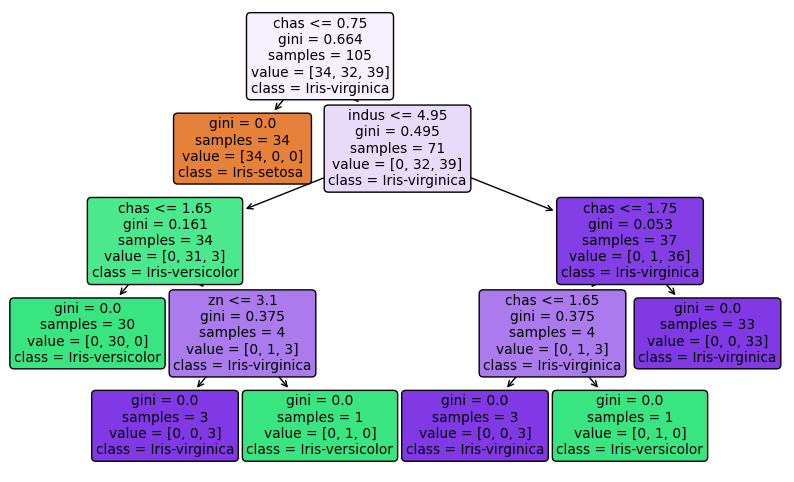

In [27]:
from sklearn import tree

plt.figure(figsize=(10,6))
tree.plot_tree(DTC,max_depth=5,
               feature_names=feature_names,
               class_names=class_names,
               filled=True, rounded=True)
plt.show()